In [2]:
#############################################################  SMS Spam Detection   ###################################################################

In [3]:
# process flow:
# Data Cleaning
# EDA
# Text Preprocessing
# Model building 
# Evaluation
# Improvement
# Website 
# Deployment

In [4]:
import numpy as np
import pandas as pd

In [5]:
sms_dataframe=pd.read_csv("spam.csv",encoding='ISO-8859-1')
sms_dataframe.reset_index(drop=True, inplace=True)

# sms_dataframe.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
sms_dataframe
# sms_dataframe.sample(5)

,Spam Or Ham,Received SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
10341,ham,"Well, i'm glad you didn't find it totally disa...",NaN,NaN,NaN
10342,ham,"Guy, no flash me now. If you go call me, call ...",NaN,NaN,NaN
10343,spam,Do you want a New Nokia 3510i colour phone Del...,NaN,NaN,NaN
10344,ham,Mark works tomorrow. He gets out at 5. His wor...,NaN,NaN,NaN


In [6]:
sms_dataframe.shape # (10346,5)

(10346, 5)

In [7]:
# Data Cleaning 
# drop/Remove last three columns as they are useless
# Data Cleaning 
# Drop/remove last three columns if they exist
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
columns_present = [col for col in columns_to_drop if col in sms_dataframe.columns]

if columns_present:
    sms_dataframe.drop(columns=columns_present, inplace=True)
    print(f"Dropped columns: {columns_present}")
else:
    print("Columns not found. They might have already been removed.")

# Print the dataframe to check if columns are dropped
print(sms_dataframe.head())

# If you want to rename the columns (uncomment the lines below)
# sms_dataframe.rename(columns={'v1':'Spam Or Ham', 'v2':'Received SMS'}, inplace=True)
# print(sms_dataframe.sample(5))

Dropped columns: ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
  Spam Or Ham                                       Received SMS
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...


In [8]:
sms_dataframe.shape

(10346, 2)

In [9]:
# now lets assign numerical value to ham and spam
import sklearn
# print(sklearn.__version__)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
sms_dataframe['Spam Or Ham']=encoder.fit_transform(sms_dataframe['Spam Or Ham'])

In [11]:
sms_dataframe.sample(10)
# here 0 is assign to Ham and 1 is assign to Spam

,Spam Or Ham,Received SMS
8840,0,Ok then i come n pick u at engin?
9365,0,Love it! I want to flood that pretty pussy wit...
6059,1,FREE MESSAGE Activate your 500 FREE Text Messa...
9850,0,I'm glad. You are following your dreams.
2795,0,Tell your friends what you plan to do on Valen...
1163,0,"New Theory: Argument wins d SITUATION, but los..."
9770,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
6991,0,Lmao. Take a pic and send it to me.
5875,0,Oh and by the way you do have more food in you...
1873,1,You have WON a guaranteed Ã¥Â£1000 cash or a Ã...


In [12]:
# lets check and remove duplicate values
sms_dataframe.duplicated().sum() # 403

4692

In [13]:
# sms_dataframe=sms_dataframe.drop_duplicates(keep='first')

In [14]:
sms_dataframe.shape

(10346, 2)

In [15]:
# EDA (Exploratory Data Analysis)

In [16]:
sms_dataframe.head()

,Spam Or Ham,Received SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
nums=sms_dataframe['Spam Or Ham'].value_counts()
print('Note: 0 is Ham 1 is Spam \n',nums)

Note: 0 is Ham 1 is Spam 
 Spam Or Ham
0    8949
1    1397
Name: count, dtype: int64


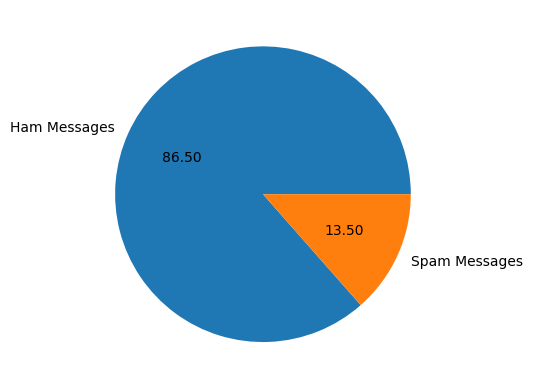

In [18]:
import matplotlib.pyplot as plt
plt.pie(sms_dataframe['Spam Or Ham'].value_counts(),labels=['Ham Messages',"Spam Messages"],autopct='%0.2F')
plt.show() # extra data will be hidden 

In [19]:
# data is imbalanced. i.e ham >> spam 

In [20]:
# Other analysis is to observe the nature of Ham and Spam sms . no of letter, words, sentences in two types of sms.
#we will create 3 new colums in sms_dataframe

In [21]:
# !pip install nltk , it is natural langauage toolkit . a NLP library

In [22]:
import nltk
nltk.download('punkt') # dependencies 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
sms_dataframe['Received SMS'] # Received SMS

0        Go until jurong point, crazy.. Available only ...
1                            Ok lar... Joking wif u oni...
2        Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor... U c already then say...
4        Nah I don't think he goes to usf, he lives aro...
                               ...                        
10341    Well, i'm glad you didn't find it totally disa...
10342    Guy, no flash me now. If you go call me, call ...
10343    Do you want a New Nokia 3510i colour phone Del...
10344    Mark works tomorrow. He gets out at 5. His wor...
10345    Keep ur problems in ur heart, b'coz nobody wil...
Name: Received SMS, Length: 10346, dtype: object

In [24]:
# sms_dataframe['Received SMS'].apply(len) # it gives no of characters in each sms 
# fetching total number of characters present in each sms 
# character_num=sms_dataframe['Received SMS'].apply(len) # into variable
sms_dataframe['no_of_characters_in_each_SMS']=sms_dataframe['Received SMS'].apply(len)
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62
10342,0,"Guy, no flash me now. If you go call me, call ...",74
10343,1,Do you want a New Nokia 3510i colour phone Del...,158
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93


In [25]:
# fetching total number of words present in each sms
sms_dataframe['Received SMS'].apply(lambda x:(nltk.word_tokenize(x)))
# returns a list containing words in each SMS

0        [Go, until, jurong, point, ,, crazy, .., Avail...
1                 [Ok, lar, ..., Joking, wif, u, oni, ...]
2        [Free, entry, in, 2, a, wkly, comp, to, win, F...
3        [U, dun, say, so, early, hor, ..., U, c, alrea...
4        [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                               ...                        
10341    [Well, ,, i, 'm, glad, you, did, n't, find, it...
10342    [Guy, ,, no, flash, me, now, ., If, you, go, c...
10343    [Do, you, want, a, New, Nokia, 3510i, colour, ...
10344    [Mark, works, tomorrow, ., He, gets, out, at, ...
10345    [Keep, ur, problems, in, ur, heart, ,, b'coz, ...
Name: Received SMS, Length: 10346, dtype: object

In [26]:
sms_dataframe['Received SMS'].apply(lambda x:len((nltk.word_tokenize(x)))) # counting no of elements in each list
sms_dataframe['no_of_words_in_each_SMS']=sms_dataframe['Received SMS'].apply(lambda x:len((nltk.word_tokenize(x)))) # adding new column
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62,14
10342,0,"Guy, no flash me now. If you go call me, call ...",74,23
10343,1,Do you want a New Nokia 3510i colour phone Del...,158,30
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93,23


In [27]:
sms_dataframe.loc[:, 'no_of_sentences_in_each_SMS'] = sms_dataframe['Received SMS'].apply(lambda x: len(nltk.sent_tokenize(x))) # adding new column in df
sms_dataframe.head()

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# now lets analyse three newly added columns
sms_dataframe[['no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']].describe()

,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
count,10346.000000,10346.000000,10346.000000
mean,86.308718,20.108448,2.096559
std,409.892977,94.776256,6.848146
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,123.000000,27.000000,2.000000
max,32819.000000,7617.000000,559.000000


In [29]:
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62,14,1
10342,0,"Guy, no flash me now. If you go call me, call ...",74,23,4
10343,1,Do you want a New Nokia 3510i colour phone Del...,158,30,2
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93,23,3


In [30]:
# for Ham SMS 
sms_dataframe[sms_dataframe['Spam Or Ham'] == 0 ] [['no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']].describe()

,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
count,8949.000000,8949.000000,8949.000000
mean,78.023131,18.882780,1.950721
std,440.000004,101.815641,7.327218
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,22.000000,2.000000
max,32819.000000,7617.000000,559.000000


In [31]:
# for Spam SMS 
sms_dataframe[sms_dataframe['Spam Or Ham'] == 1 ] [['no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']].describe()


,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
count,1397.000000,1397.000000,1397.000000
mean,139.385111,27.959914,3.030780
std,29.368653,6.877549,1.546712
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


In [32]:
# from above two tables,mean of no of words in each SMS for ham is 17.12  and for spam is 27.66. simple insights:spam are usually long messages than ham

In [33]:
import seaborn as sns

<Axes: xlabel='no_of_characters_in_each_SMS', ylabel='Count'>

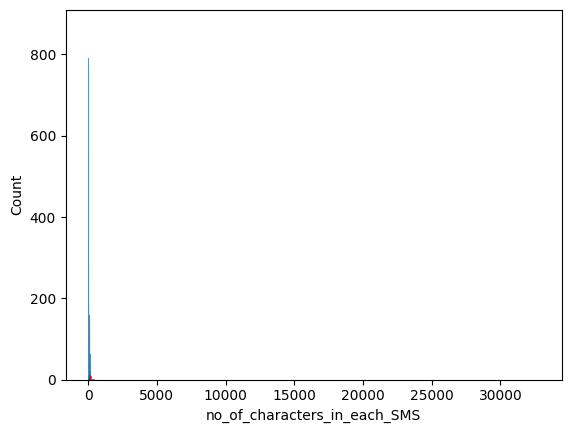

In [34]:
# histogram between Spam and Ham according to no of character in each sms
sns.histplot(sms_dataframe[sms_dataframe['Spam Or Ham'] == 0 ]['no_of_characters_in_each_SMS'])
sns.histplot(sms_dataframe[sms_dataframe['Spam Or Ham'] == 1 ]['no_of_characters_in_each_SMS'],color='red')

<Axes: xlabel='no_of_words_in_each_SMS', ylabel='Count'>

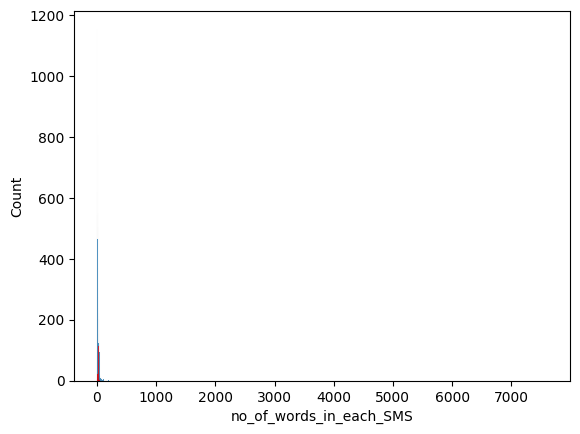

In [35]:
# histogram between Spam and Ham according to no of word in each sms
sns.histplot(sms_dataframe[sms_dataframe['Spam Or Ham'] == 0 ]['no_of_words_in_each_SMS'])
sns.histplot(sms_dataframe[sms_dataframe['Spam Or Ham'] == 1 ]['no_of_words_in_each_SMS'],color='red')

<Axes: xlabel='no_of_sentences_in_each_SMS', ylabel='Count'>

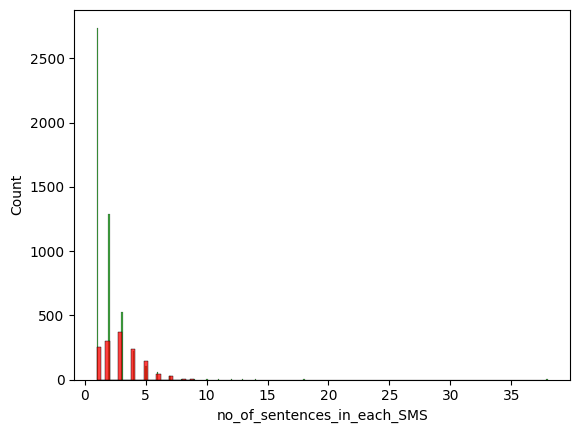

In [36]:
# histogram between Spam and Ham according to no of sentences in each sms
sns.histplot(sms_dataframe[sms_dataframe['Spam Or Ham'] == 0 ]['no_of_sentences_in_each_SMS'].head(5000),color='green')
sns.histplot(sms_dataframe[sms_dataframe['Spam Or Ham'] == 1 ]['no_of_sentences_in_each_SMS'].head(5000),color='red')

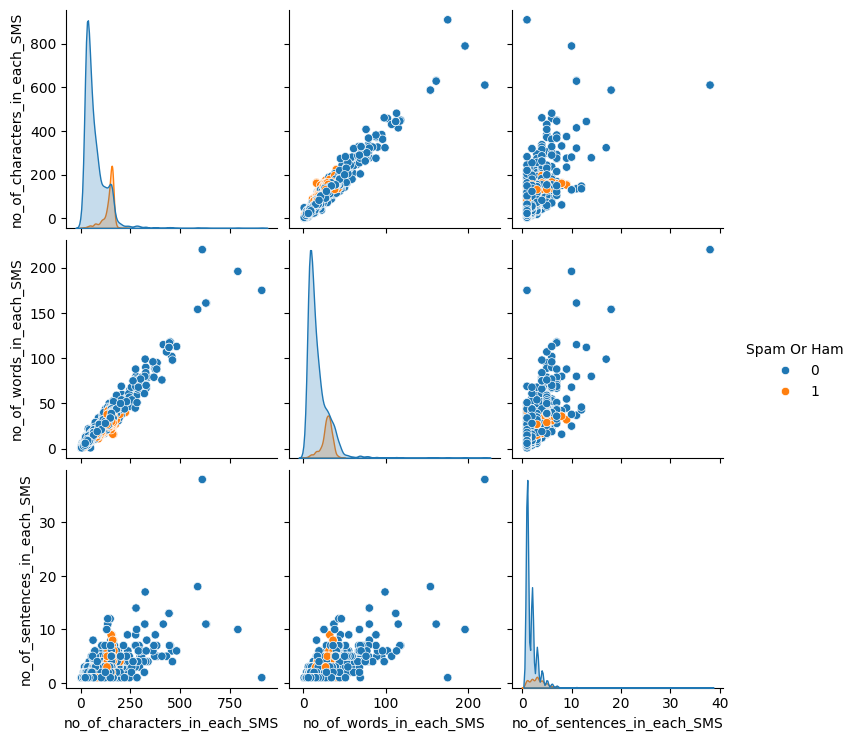

In [37]:
# relation between each columns with each others
# Subset the first 5,000 data points from the dataframe
subset_dataframe = sms_dataframe.head(10000)
# Create a pairplot for the subset data with 'Spam Or Ham' as hue
sns.pairplot(subset_dataframe, hue='Spam Or Ham')
# Display the plot
plt.show()

In [38]:
# lets see correlation between three added columns
numeric_dataframe=sms_dataframe[['Spam Or Ham','no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']]
numeric_dataframe.corr()

,Spam Or Ham,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
Spam Or Ham,1.000000,0.051164,0.032733,0.053902
no_of_characters_in_each_SMS,0.051164,1.000000,0.999257,0.983724
no_of_words_in_each_SMS,0.032733,0.999257,1.000000,0.985765
no_of_sentences_in_each_SMS,0.053902,0.983724,0.985765,1.000000


<Axes: >

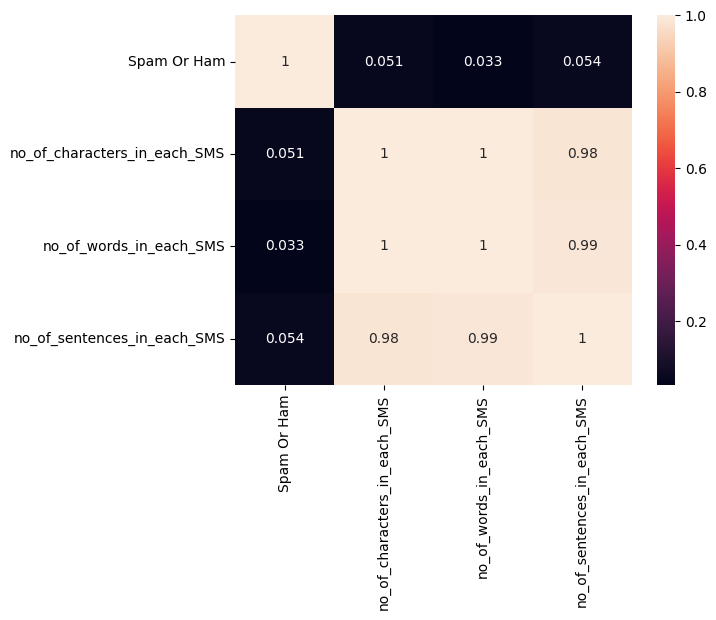

In [39]:
sns.heatmap(numeric_dataframe.corr(),annot=True)

In [40]:
# conclusion: variance of 'no of character in each sms' with target is greates . so for model building we will use that column

In [41]:
# Data Preprocessing (for this case text preprocessing)
# process or flow involed: Lower case, Tokenization, Removing special characters, removing stop words and punctuaion and stemming
# lets make a function that performs above taks on getting text (Received SMS) as input 
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


def transform_text(text):
    text = text.lower() # change text to lowercase

    tokens = nltk.word_tokenize(text) # Tokenize the text
    
    filtered_tokens = [] # empty list
    

    for token in tokens:     # Remove special characters
        if token.isalnum():
            filtered_tokens.append(token)
    
# Remove stopwords and punctuation
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords.words('english') and token not in string.punctuation]
    

    porter = PorterStemmer()  # Initialize Porter stemmer
    
    
    stemmed_tokens = [porter.stem(token) for token in filtered_tokens] # Stem each token to its root form
    
    return stemmed_tokens

In [42]:
# validating above transform function (test function)
transform_text('I love the way Andrew NG smiles. Are you taking his lectures ???')
# transform_text('Hello Mr. Sudip Gautam')

['love', 'way', 'andrew', 'ng', 'smile', 'take', 'lectur']

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
# Now lets transform Received SMS into required form which is defined by transform_text() function, above 
sms_dataframe['transformed_text']=sms_dataframe['Received SMS'].apply(transform_text)

In [46]:
sms_dataframe['transformed_text'] = sms_dataframe['transformed_text'].astype(str)
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."
...,...,...,...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62,14,1,"['well', 'glad', 'find', 'total', 'disagre', '..."
10342,0,"Guy, no flash me now. If you go call me, call ...",74,23,4,"['guy', 'flash', 'go', 'call', 'call', 'madam'..."
10343,1,Do you want a New Nokia 3510i colour phone Del...,158,30,2,"['want', 'new', 'nokia', '3510i', 'colour', 'p..."
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93,23,3,"['mark', 'work', 'tomorrow', 'get', 'work', 'h..."


In [47]:
# now lets see wordcloud( frequency of words in a given text or corpus.) to see which words are mostly used in Spam and Ham
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=700, height=700, min_font_size=10, background_color='white')

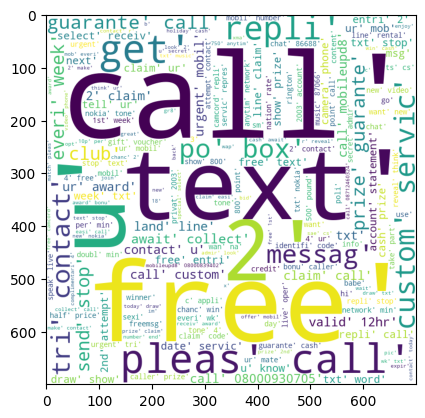

In [48]:
spam_wc = wc.generate(sms_dataframe[sms_dataframe['Spam Or Ham']==1] ['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

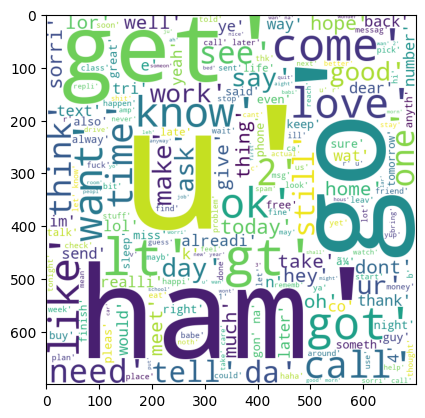

In [49]:
ham_wc = wc.generate(sms_dataframe[sms_dataframe['Spam Or Ham']==0] ['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [50]:
# now lets observe top 50 words in Spam and Ham messages

In [51]:
# sms_dataframe[sms_dataframe['Spam Or Ham']==1]['transformed_text'].tolist()
spam_corpus=[]
for msg in sms_dataframe[sms_dataframe['Spam Or Ham']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

21542

In [53]:
import collections
spam_counter = collections.Counter(spam_corpus)
most_common_items = spam_counter.most_common(7)
print('7 Most repetative words in Spam Messages:',most_common_items)

7 Most repetative words in Spam Messages: [("'call',", 645), ("'free',", 333), ("'2',", 329), ("'txt',", 314), ("'text',", 252), ("'ur',", 234), ("'mobil',", 224)]


## Model Building

In [54]:
# There is a consensus that in textual data Naive Bayes algorithms works well .
# our input is under the column named 'transformed_text' but for any model we need numbers . so lets convert our ip to vectors 
# Vectorization using BoW (Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()
a=cv.fit_transform(sms_dataframe['transformed_text']).toarray()

In [55]:
a.shape 

(10346, 6778)

In [56]:
b=sms_dataframe['Spam Or Ham'].values
b

array([0, 0, 1, ..., 1, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a,b,test_size=0.2, random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print('Gaussian Naive Bayes Model')
print('Accuracy: ',accuracy_score(y_test,y_pred1))
print('Precision:',precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Gaussian Naive Bayes Model
Accuracy:  0.9115942028985508
Precision: 0.6067415730337079
[[1617  175]
 [   8  270]]


In [60]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('Multinomial Naive Bayes Model')
print('Accuracy: ',accuracy_score(y_test,y_pred2))
print('Precision:',precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Multinomial Naive Bayes Model
Accuracy:  0.9884057971014493
Precision: 0.9409722222222222
[[1775   17]
 [   7  271]]


In [61]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print('Bernoulli Naive Bayes Model')
print('Accuracy: ',accuracy_score(y_test,y_pred3))
print('Precision:',precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

Bernoulli Naive Bayes Model
Accuracy:  0.9893719806763285
Precision: 0.9740740740740741
[[1785    7]
 [  15  263]]


In [62]:
# we have class imbalance so precision ( False Positive kati dinxa ?) is very important best we have upto here is 97.34%
# instead of using CountVectorizer(Bag of Words) lets use Tfidf vectorizer . same as above 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# tfidf=TfidfVectorizer() # before model improvement 
tfidf=TfidfVectorizer(max_features=3000) # afrer model improvement . 

In [64]:
x=tfidf.fit_transform(sms_dataframe['transformed_text']).toarray()
y=sms_dataframe['Spam Or Ham'].values

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('Multinomial Naive Bayes Model')
print('Accuracy: ',accuracy_score(y_test,y_pred2))
print('Precision:',precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Multinomial Naive Bayes Model
Accuracy:  0.9903381642512077
Precision: 0.9961538461538462
[[1791    1]
 [  19  259]]


In [68]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print('Gaussian Naive Bayes Model')
print('Accuracy: ',accuracy_score(y_test,y_pred1))
print('Precision:',precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Gaussian Naive Bayes Model
Accuracy:  0.8855072463768116
Precision: 0.5407554671968191
[[1561  231]
 [   6  272]]


In [69]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print('Bernoulli Naive Bayes Model')
print('Accuracy: ',accuracy_score(y_test,y_pred3))
print('Precision:',precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

Bernoulli Naive Bayes Model
Accuracy:  0.9898550724637681
Precision: 0.9885931558935361
[[1789    3]
 [  18  260]]


In [70]:
# here in Multinomial Naive Bayes though accuracy decreases slightly precesion score increases to 99.61% . for this scenario precesion greatly matters
# so lets choose MNB algorithm with tfidf for vectorization  

In [71]:
# model improvement :
# Random forest and extra tree gives slighlty better accuracy score than naive bayes algorithm with same precision score .
# changing max_feature parameter of tfidf helps to increase accuracy from 95 to 97 with same 100% precision score 

In [72]:
# whenever a new text is provide:1. convert it into suitable form by transform_text() 2. vectorize it  3. apply model over it 

In [73]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))

In [74]:
#################################################################   End   #############################################################################